<a href="https://colab.research.google.com/github/manhduc07/Toan/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Thành viên:

1. Trần Lý Bửu
2. Nguyễn Trịnh Tấn Đạt
3. Mai Nhật Minh
4. Nguyễn Đức Mạnh
5. Trần Văn Tuấn Phong
6. Lê Văn Tân
7. Trần Đoàn Ngọc Duy

In [ ]:
import pandas as pd

df = pd.read_csv("data.csv")
df

,x,y
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def mean_squared_error(y_true, y_predicted):
	
	# Tính loss function và cost function
	cost = np.sum((y_true-y_predicted)**2) / len(y_true)
	return cost

# Gradient Descent Function
# Here iterations, learning_rate, stopping_threshold
def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001,
					stopping_threshold = 1e-6):
	
	# Khởi tạo weight, bias, learning rate và iterations
	current_weight = 0.1
	current_bias = 0.01
	iterations = iterations
	learning_rate = learning_rate
	n = float(len(x))
	
	costs = []
	weights = []
	previous_cost = None
	
	# Ước tính các tham số tối ưu
	for i in range(iterations):
		
		y_predicted = (current_weight * x) + current_bias
		
		current_cost = mean_squared_error(y, y_predicted)

		if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
			break
		
		previous_cost = current_cost

		costs.append(current_cost)
		weights.append(current_weight)

		weight_derivative = -(2/n) * sum(x * (y-y_predicted))
		bias_derivative = -(2/n) * sum(y-y_predicted)

		current_weight = current_weight - (learning_rate * weight_derivative)
		current_bias = current_bias - (learning_rate * bias_derivative)
	
	# Biểu diễn weight, cost
	plt.figure(figsize = (8,6))
	plt.plot(weights, costs)
	plt.scatter(weights, costs, marker='o', color='red')
	plt.title("Cost vs Weights")
	plt.ylabel("Cost")
	plt.xlabel("Weight")
	plt.show()
	
	return current_weight, current_bias

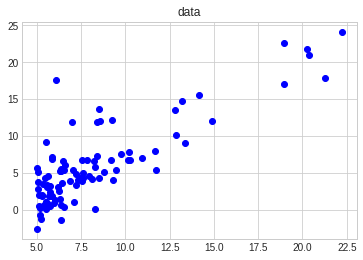

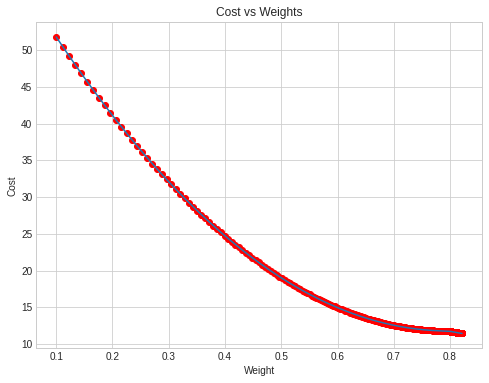

Estimated Weight: 0.8214385073384083
Estimated Bias: -0.19687579618981738


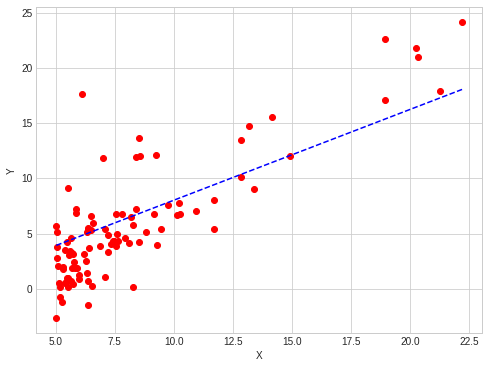

In [ ]:
X = df["x"]
Y = df["y"]
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(X, Y, 'o', color='blue')
plt.title("data")
# Estimating weight and bias using gradient descent
estimated_weight, estimated_bias = gradient_descent(X, Y, iterations=2000)
print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")

# Making predictions using estimated parameters
Y_pred = estimated_weight*X + estimated_bias

# Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(X, Y, marker='o', color='red')
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',
    markersize=10,linestyle='dashed')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()